In [4]:
from torch import nn
from torchinfo import summary

In [99]:
class Model(nn.Module):
    def __init__(self, input, num):
        super(Model, self).__init__()
        
        # ネットワークを定義
        self.linear1 = nn.Linear(input, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 16)
        self.relu = nn.ReLU()
        self.sequence = nn.Sequential(nn.Linear(16, 16), nn.Linear(16, 16))
        self.num = num

    # 順伝搬を定義
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        if self.num == 1:
            self.sequence(x)
        self.num = 2
        return x

In [105]:
input = 2 
batch_size = 16
num = 1
net = Model(input=input, num=num).to(device)
print(net.num)
# summary(net, input_size=(batch_size, input))

1
1


In [106]:
from torch import Tensor

In [107]:
device = 'cpu'
print(net.num)
net(Tensor([[1, 2], [3, 4]]).to(device))
print(net.num)

1


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

In [93]:
net.num

2

In [67]:
input = 10
batch_size = 16
num = 2
net = Model(input=input, num=num)
summary(net, input_size=(batch_size, input))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [16, 16]                  --
├─Linear: 1-1                            [16, 32]                  352
├─ReLU: 1-2                              [16, 32]                  --
├─Linear: 1-3                            [16, 16]                  528
├─ReLU: 1-4                              [16, 16]                  --
├─Linear: 1-5                            [16, 16]                  272
Total params: 1,152
Trainable params: 1,152
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [14]:
print(net)

Model(
  (linear1): Linear(in_features=10, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
)


In [15]:
from torchviz import make_dot

In [16]:
make_dot(net)

AttributeError: 'Model' object has no attribute 'size'

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

INPUT_SIZE = 10

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(INPUT, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softamx(x)

        return x


In [18]:
import torch

from torchviz import make_dot
from NeuralNet import NeuralNet

INPUT_SIZE = 28*28

model = NeuralNet()
data = torch.randn(1, INPUT_SIZE)

y = model(data)

image = make_dot(y, params=dict(model.named_parameters()))
image.format = "png"
image.render("NeuralNet")


ModuleNotFoundError: No module named 'NeuralNet'

In [27]:
list(model.named_parameters())

[('W0.weight',
  Parameter containing:
  tensor([[-0.1846, -0.1111, -0.0543, -0.1539, -0.2363, -0.1632, -0.0067,  0.0902],
          [-0.3191,  0.0854, -0.3252,  0.2431, -0.3236,  0.2112, -0.2844, -0.2679],
          [ 0.2610,  0.3262,  0.1313,  0.1050,  0.0471,  0.0479, -0.1857,  0.2085],
          [ 0.1907, -0.2219, -0.1572,  0.0967, -0.1080, -0.1362, -0.0184, -0.0371],
          [ 0.2264,  0.2605, -0.1773, -0.3300, -0.0887,  0.3433,  0.0591, -0.0135],
          [ 0.0868, -0.2216,  0.2044,  0.2038,  0.2450, -0.0038, -0.3134, -0.0393],
          [ 0.1089,  0.2507, -0.2635, -0.0554,  0.3375,  0.2781,  0.2068, -0.3478],
          [-0.0183, -0.0857, -0.0250, -0.1551,  0.0483,  0.3473,  0.2334, -0.2631],
          [ 0.0212,  0.1156,  0.3057,  0.3156, -0.2064, -0.0529,  0.2717, -0.2112],
          [ 0.0250,  0.0848, -0.3014, -0.2798,  0.2224,  0.2990,  0.3130,  0.1061],
          [-0.3509, -0.3166,  0.3168,  0.2244, -0.0243, -0.2407,  0.1022, -0.1545],
          [-0.1046,  0.2606,  0.1614,

In [33]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
# model.add_module('tanh', nn.Tanh())
# model.add_module('W1', nn.Linear(16, 1))

x = torch.randn(1, 8)
y = model(x)

summary(model, input_data=x)

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 16]                   --
├─Linear: 1-1                            [1, 16]                   144
Total params: 144
Trainable params: 144
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [52]:
list(model.named_parameters())

[('W0.weight',
  Parameter containing:
  tensor([[ 0.1559,  0.0970, -0.0646,  0.1120,  0.1869,  0.3201,  0.0009,  0.2453],
          [-0.0997,  0.2147,  0.0739, -0.2861,  0.2898,  0.0293, -0.3219,  0.3397],
          [-0.1803, -0.2201,  0.1540,  0.1125,  0.3091, -0.0258,  0.2781, -0.2892],
          [ 0.0850, -0.3377,  0.2349,  0.3470, -0.0419, -0.1101, -0.2063,  0.0107],
          [-0.2925, -0.3168,  0.0219, -0.0615, -0.1871, -0.0244, -0.1048, -0.0588],
          [-0.0322,  0.0881,  0.1199,  0.1179, -0.2943, -0.1082, -0.1850,  0.3044],
          [ 0.0551, -0.3397, -0.1038,  0.3363, -0.2319,  0.0703, -0.2739, -0.0315],
          [ 0.1996,  0.1507,  0.0378, -0.0611, -0.1338,  0.0888,  0.2200, -0.1042],
          [ 0.1484,  0.1198,  0.1787, -0.0670,  0.3276,  0.3150,  0.0225,  0.0143],
          [-0.2754,  0.2123, -0.1274, -0.3439,  0.0861, -0.2745,  0.2891,  0.0139],
          [ 0.2097,  0.2383,  0.2742,  0.1937, -0.1714,  0.0305,  0.2329, -0.1773],
          [-0.2197,  0.3121, -0.2383,

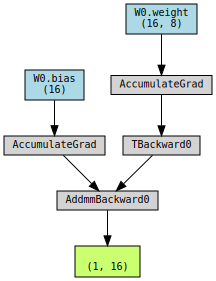

In [45]:
# make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)
make_dot(y, params=dict(list(model.named_parameters())))